In [891]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('fifa.csv')

C:\Users\vladm\AppData\Local\Temp\ipykernel_21824\2836138338.py:5: DtypeWarning: Columns (24,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fifa.csv')


In [892]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age', 'dob', 'height_cm', 'weight_kg', 'club_position', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_loaned_from',
       'club_joined', 'club_jersey_number', 'club_contract_valid_until',
       'nationality_name', 'nation_team_id', 'nation_position',
       'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_spe

Firstly,I will delete obvious useless columns.
I will delete the column **club_loaned_from** because it has 300 not missing values from 19000 rows.
**club_joined,club_contract_valid_until,release_clause_eur** because I think it has very low correlation with player_position.
 

In [893]:
columnsToDrop = [ 'sofifa_id','player_url','long_name','dob','club_team_id','club_loaned_from','club_joined','club_jersey_number',
                 'club_contract_valid_until', 'nation_team_id','nation_jersey_number','release_clause_eur',
                 'player_face_url', 'club_logo_url', 'nation_logo_url','nation_flag_url']
df.drop(columnsToDrop, axis=1, inplace=True)

In [894]:
df.columns

Index(['short_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_position',
       'club_name', 'league_name', 'league_level', 'nationality_name',
       'nation_position', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'player_tags',
       'player_traits', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'me

1. Top 100 players with the highest rating

In [895]:
top100_rating = df[['short_name','overall','wage_eur']].sort_values(by=['overall'], ascending=False).head(100)
top100_rating.head(30)

,short_name,overall,wage_eur
0,L. Messi,93,320000.0
1,R. Lewandowski,92,270000.0
2,Cristiano Ronaldo,91,270000.0
3,Neymar Jr,91,270000.0
4,K. De Bruyne,91,350000.0
5,J. Oblak,91,130000.0
6,K. Mbappé,91,230000.0
7,M. Neuer,90,86000.0
8,M. ter Stegen,90,250000.0
9,H. Kane,90,240000.0


2. Top 100 players with the highest salaries.

In [896]:
top100_salaries = df[['short_name','overall','wage_eur']].sort_values(by=['wage_eur'], ascending=False).head(100)
top100_salaries.head(30)

,short_name,overall,wage_eur
4,K. De Bruyne,91,350000.0
11,K. Benzema,89,350000.0
0,L. Messi,93,320000.0
14,Casemiro,89,310000.0
24,T. Kroos,88,310000.0
27,R. Sterling,88,290000.0
2,Cristiano Ronaldo,91,270000.0
3,Neymar Jr,91,270000.0
1,R. Lewandowski,92,270000.0
17,M. Salah,89,270000.0


In [897]:
merged = pd.merge(top100_rating, top100_salaries,how='outer', on='short_name',indicator=True)
merged._merge.value_counts()

_merge
both          66
left_only     34
right_only    34
Name: count, dtype: int64

In general, top-rated football players receive top salaries, which is logical. However, there are also renowned football players who are not among the top 100 in ratings but still receive high salaries.

3.Top 30 goalkeepers with the highest rating.

In [898]:
goalkeepers = df[df.player_positions.str.contains("GK")] 
goalkeepers = goalkeepers.sort_values(by=['overall'], ascending=False)
top30_goalkeepers = goalkeepers[['short_name','overall','wage_eur','club_name']].head(30)
top30_goalkeepers

,short_name,overall,wage_eur,club_name
5,J. Oblak,91,130000.0,Atlético de Madrid
8,M. ter Stegen,90,250000.0,FC Barcelona
7,M. Neuer,90,86000.0,FC Bayern München
12,T. Courtois,89,250000.0,Real Madrid CF
18,Ederson,89,200000.0,Manchester City
20,Alisson,89,190000.0,Liverpool
21,G. Donnarumma,89,110000.0,Paris Saint-Germain
26,K. Navas,88,130000.0,Paris Saint-Germain
31,H. Lloris,87,125000.0,Tottenham Hotspur
34,W. Szczęsny,87,105000.0,Juventus


Top 30 teams with the highest-rated players.

In average, per tournament ,teams uses 20 different players.I will only count the first 20 players in each team.

In [899]:
club_names = df.club_name.unique()
average_club_rating = {}
for club_name in club_names:
    club = df[df['club_name'] == club_name]
    club = club.sort_values(by=['overall'], ascending=False).head(20)
    average_club_rating[club_name] = club['overall'].mean()
top30_teams_by_rating = pd.DataFrame(list(average_club_rating.items()),columns = ['club_name','average_rating'])
top30_teams_by_rating = top30_teams_by_rating.sort_values(by=['average_rating'], ascending=False)
top30_teams_by_rating = top30_teams_by_rating.head(30).reset_index(drop=True)





In [900]:
top30_teams_by_rating

,club_name,average_rating
0,Paris Saint-Germain,85.05
1,Manchester City,84.55
2,Real Madrid CF,83.55
3,Atlético de Madrid,83.40
4,Manchester United,83.35
5,Liverpool,83.00
6,Chelsea,82.90
7,FC Bayern München,82.50
8,Juventus,82.15
9,FC Barcelona,81.90


Top 30 teams in which players have the fastest average speed

Pace column consists of movement_acelration and movement_sprint_speed.It will be our metric for speed.

In [901]:
club_names = df.club_name.unique()
average_club_speed = {}
for club_name in club_names:
    club = df[df['club_name'] == club_name]
    club = club.sort_values(by=['pace'], ascending=False).head(20)
    average_club_speed[club_name] = club['pace'].mean()
top30_teams_by_speed = pd.DataFrame(list(average_club_speed.items()),columns = ['club_name','average_speed'])
top30_teams_by_speed = top30_teams_by_speed.sort_values(by=['average_speed'], ascending=False)
top30_teams_by_speed = top30_teams_by_speed.head(30).reset_index(drop=True)
top30_teams_by_speed

,club_name,average_speed
0,Real Madrid CF,80.40
1,Manchester City,80.10
2,Paris Saint-Germain,80.00
3,Manchester United,80.00
4,SK Slavia Praha,79.30
5,FC Barcelona,79.20
6,RCD Espanyol de Barcelona,79.10
7,OGC Nice,79.00
8,Arsenal,78.90
9,FC Red Bull Salzburg,78.80


6. Top 10 of all Leagues in which the best dribblers

Also,we cant just take mean of dribbling column because it has low rating players who never was in international tournaments.I will take only 200 people from each league and drop the league with less than 200 players.

In [902]:
average_league_dribbling = {}

league_names = df.league_name.unique()
for league_name in league_names:
    league = df[df['league_name'] == league_name]
    if len(league) > 200:
        league = league.sort_values(by=['dribbling'], ascending=False).head(200)
        average_league_dribbling[league_name] = league['dribbling'].mean()
top30_leagues_by_dribbling = pd.DataFrame(list(average_league_dribbling.items()),columns = ['league_name','average_dribbling'])
top30_leagues_by_dribbling = top30_leagues_by_dribbling.sort_values(by=['average_dribbling'], ascending=False)
top30_leagues_by_dribbling = top30_leagues_by_dribbling.head(30).reset_index(drop=True)
top30_leagues_by_dribbling
    

,league_name,average_dribbling
0,English Premier League,79.835
1,Spain Primera Division,78.815
2,Italian Serie A,78.270
3,German 1. Bundesliga,77.025
4,French Ligue 1,76.620
5,Portuguese Liga ZON SAGRES,73.580
6,Turkish Süper Lig,73.480
7,Argentina Primera División,73.240
8,USA Major League Soccer,72.580
9,Campeonato Brasileiro Série A,72.045


7. Top 30 teams with the highest rated players including 1 goalkeeper, 4 defenders, 4 midfielders, 2 forwards.

I checked, there are football players who can be, for example, defenders and linebackers at the same time, so count the specific number of exactly 4 defenders, etc. can not
I will use first position which comes in player_positions

**I don't create lines with potential positions of players, because I checked in mine so my model is much more accurate**

In [903]:
df['player_positions'] = df['player_positions'].str.replace(r'\s', '', regex=True)
df['player_positions']= df['player_positions'].str.split(',', expand=False)
df['player_positions'] = df['player_positions'].str[0]

In [904]:
club_with_best_of_eleven_players = {}
list_defenders = ['CB','LB','RB','LWB','RWB']
list_midfielders = ['CDM','CM','CAM','RM','LM','LW','RW']
list_attackers = ['CF','ST']
list_goalkeepers = ['GK']

for club_name in club_names:
    sum_ = 0
    club = df[df['club_name'] == club_name]
    four_defenders = club[club['player_positions'].isin(list_defenders)==True].sort_values(by=['overall'], ascending=False).head(4)
    four_midfielders = club[club['player_positions'].isin(list_midfielders)==True].sort_values(by=['overall'], ascending=False).head(4)
    two_attackers = club[club['player_positions'].isin(list_attackers)==True].sort_values(by=['overall'], ascending=False).head(2)
    one_goalkeeper = club[club['player_positions'].isin(list_goalkeepers)==True].sort_values(by=['overall'], ascending=False).head(1)

    sum_ = sum_ +four_midfielders['overall'].sum()
    sum_ = sum_ + two_attackers['overall'].sum()
    sum_ = sum_ + one_goalkeeper['overall'].sum()
    sum_ = sum_ + four_defenders['overall'].sum()
    sum_ = sum_/11 
    club_with_best_of_eleven_players[club_name] = sum_
club_with_best_of_eleven_players
df_club_with_best_of_eleven_players = pd.DataFrame.from_dict(club_with_best_of_eleven_players, orient='index', columns=['average_club_rating'])
df_club_with_best_of_eleven_players = df_club_with_best_of_eleven_players.reset_index()
df_club_with_best_of_eleven_players = df_club_with_best_of_eleven_players.rename(columns={'index':'club_name'})
df_club_with_best_of_eleven_players = df_club_with_best_of_eleven_players.sort_values(by=['average_club_rating'], ascending=False)
top30_clubs_by_best_of_eleven_players = df_club_with_best_of_eleven_players.head(30)


In [905]:
top30_clubs_by_best_of_eleven_players

,club_name,average_club_rating
0,Paris Saint-Germain,87.636364
9,Liverpool,86.000000
2,Manchester United,85.818182
8,Real Madrid CF,85.454545
4,Atlético de Madrid,85.272727
1,FC Bayern München,85.090909
5,FC Barcelona,84.818182
3,Manchester City,84.636364
7,Chelsea,84.636364
11,Juventus,84.090909


## Part Two

8. Diagram of distribution of players by age by position.

In [906]:
list_defenders = ['CB','LB','RB','LWB','RWB']
list_midfielders = ['CDM','CM','CAM','RM','LM','LW','RW']
list_attackers = ['CF','ST']
list_goalkeepers = ['GK']

In [907]:

df.loc[((df['player_positions'].isin(list_defenders)) ==True),'type_of_player'] = 'defender'
df.loc[((df['player_positions'].isin(list_attackers)) ==True),'type_of_player'] = 'atacker'
df.loc[((df['player_positions'].isin(list_midfielders)) ==True),'type_of_player'] = 'midfielder'
df.loc[((df['player_positions'].isin(list_goalkeepers)) ==True),'type_of_player'] = 'goalkeeper'


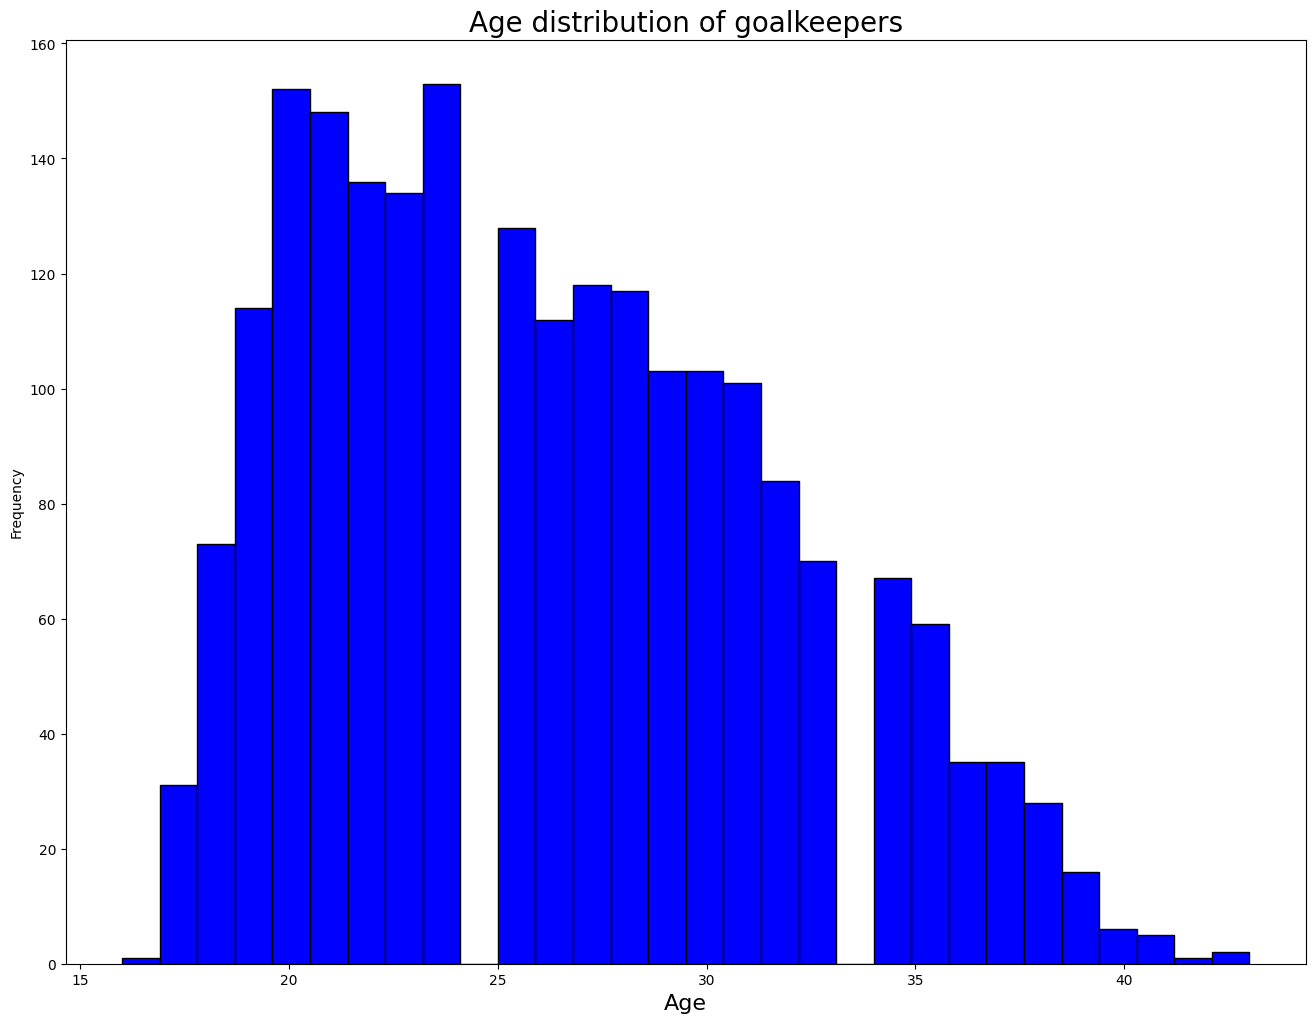

In [908]:
fig, ax = plt.subplots(figsize = (16,12))
df['age'][df['type_of_player'] == 'goalkeeper'].plot(kind = "hist", bins = 30, color = "blue", edgecolor = "black", ax = ax)
ax.set_title("Age distribution of goalkeepers", fontsize = 20)
ax.set_xlabel("Age", fontsize = 16)
plt.show()

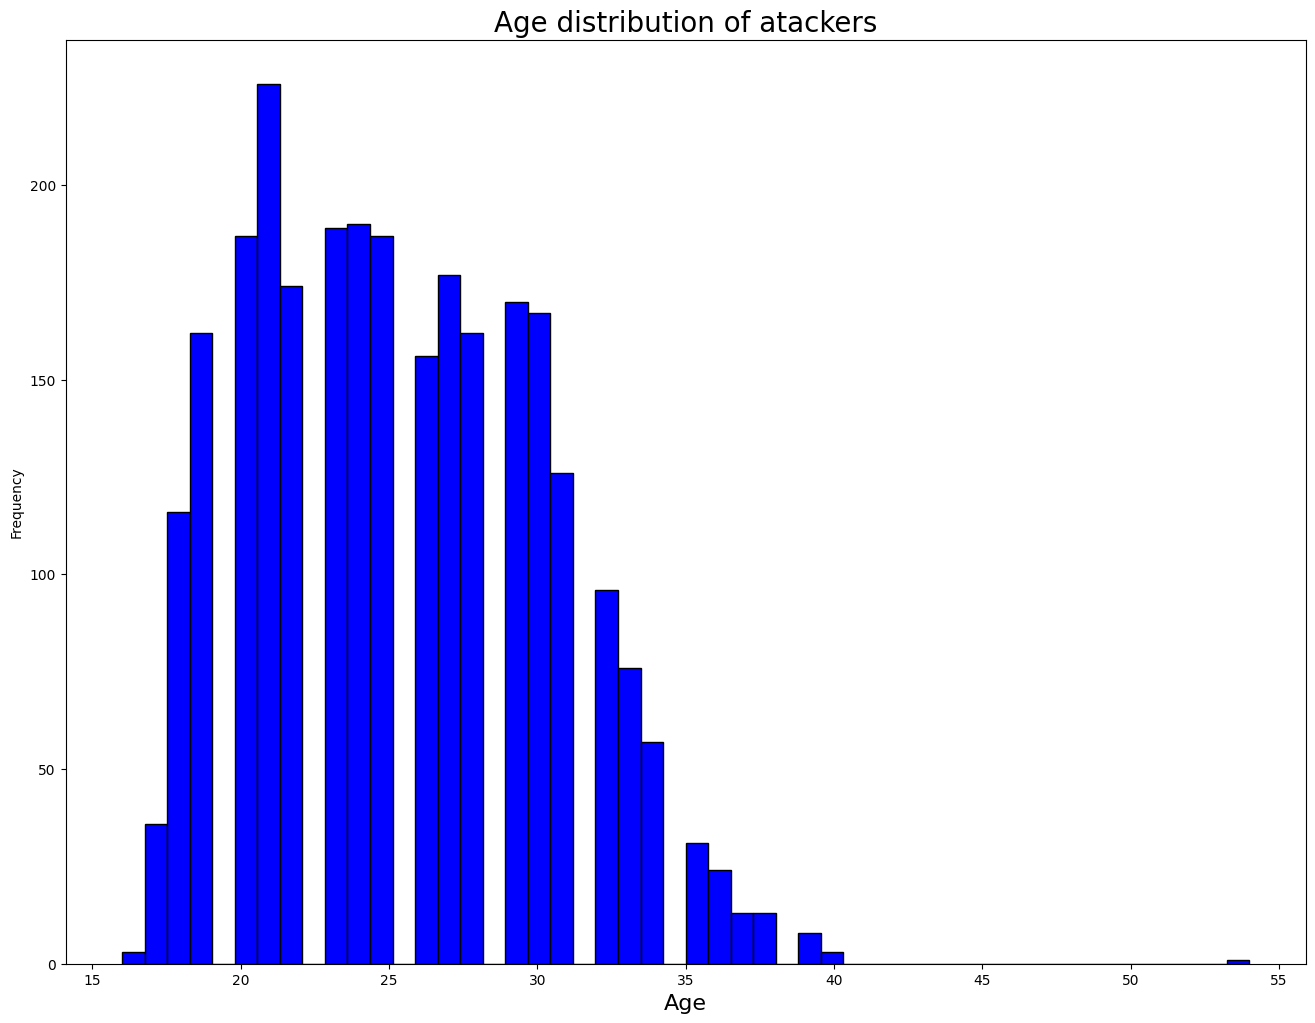

In [909]:

fig, ax = plt.subplots(figsize = (16,12))
df['age'][df['type_of_player'] == 'atacker'].plot(kind = "hist", bins = 50, color = "blue", edgecolor = "black", ax = ax)
ax.set_title("Age distribution of atackers", fontsize = 20)
ax.set_xlabel("Age", fontsize = 16)
plt.show()

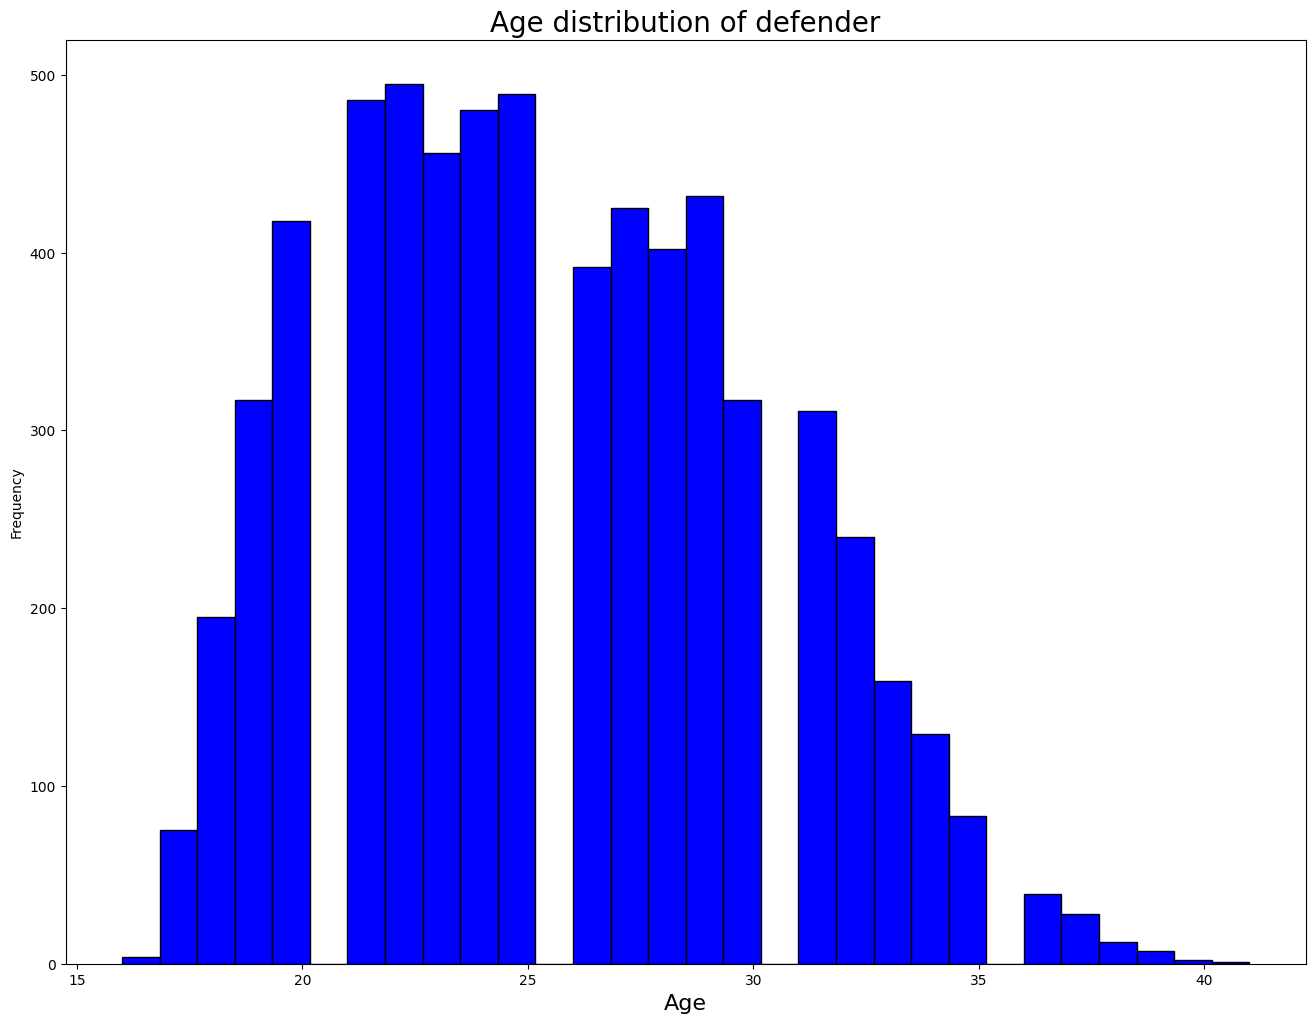

In [910]:

fig, ax = plt.subplots(figsize = (16,12))
df['age'][df['type_of_player'] == 'defender'].plot(kind = "hist", bins = 30, color = "blue", edgecolor = "black", ax = ax)
ax.set_title("Age distribution of defender", fontsize = 20)
ax.set_xlabel("Age", fontsize = 16)
plt.show()

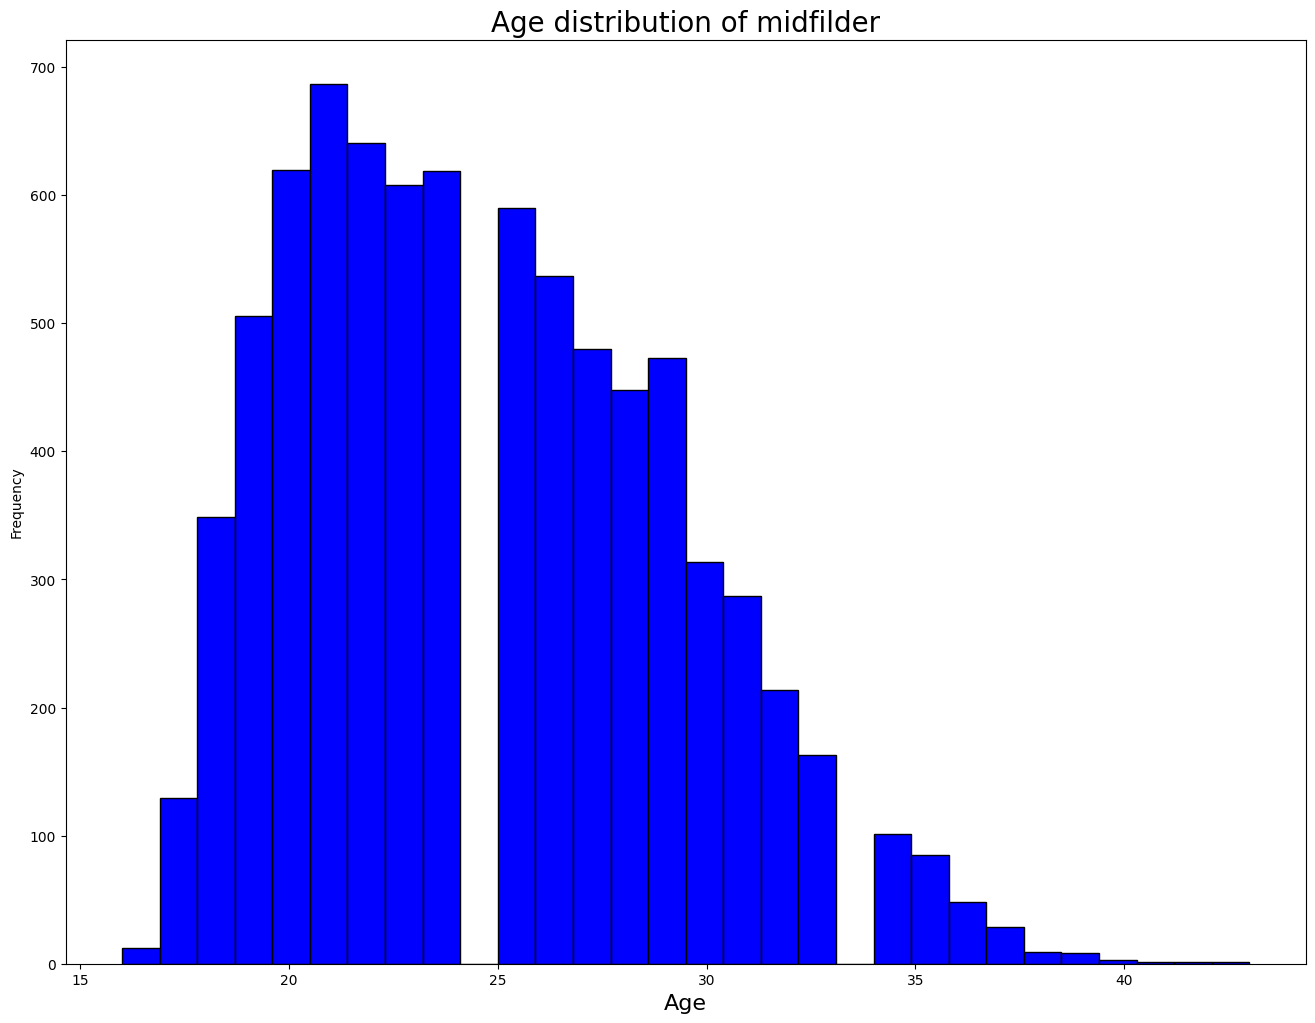

In [911]:

fig, ax = plt.subplots(figsize = (16,12))
df['age'][df['type_of_player'] == 'midfielder'].plot(kind = "hist", bins = 30, color = "blue", edgecolor = "black", ax = ax)
ax.set_title("Age distribution of midfilder", fontsize = 20)
ax.set_xlabel("Age", fontsize = 16)
plt.show()

We can conclude that teams recruit young players because they believe that they have greater potential and we can  see that we have some outliers

9. Diagram of distribution of players by position rating.

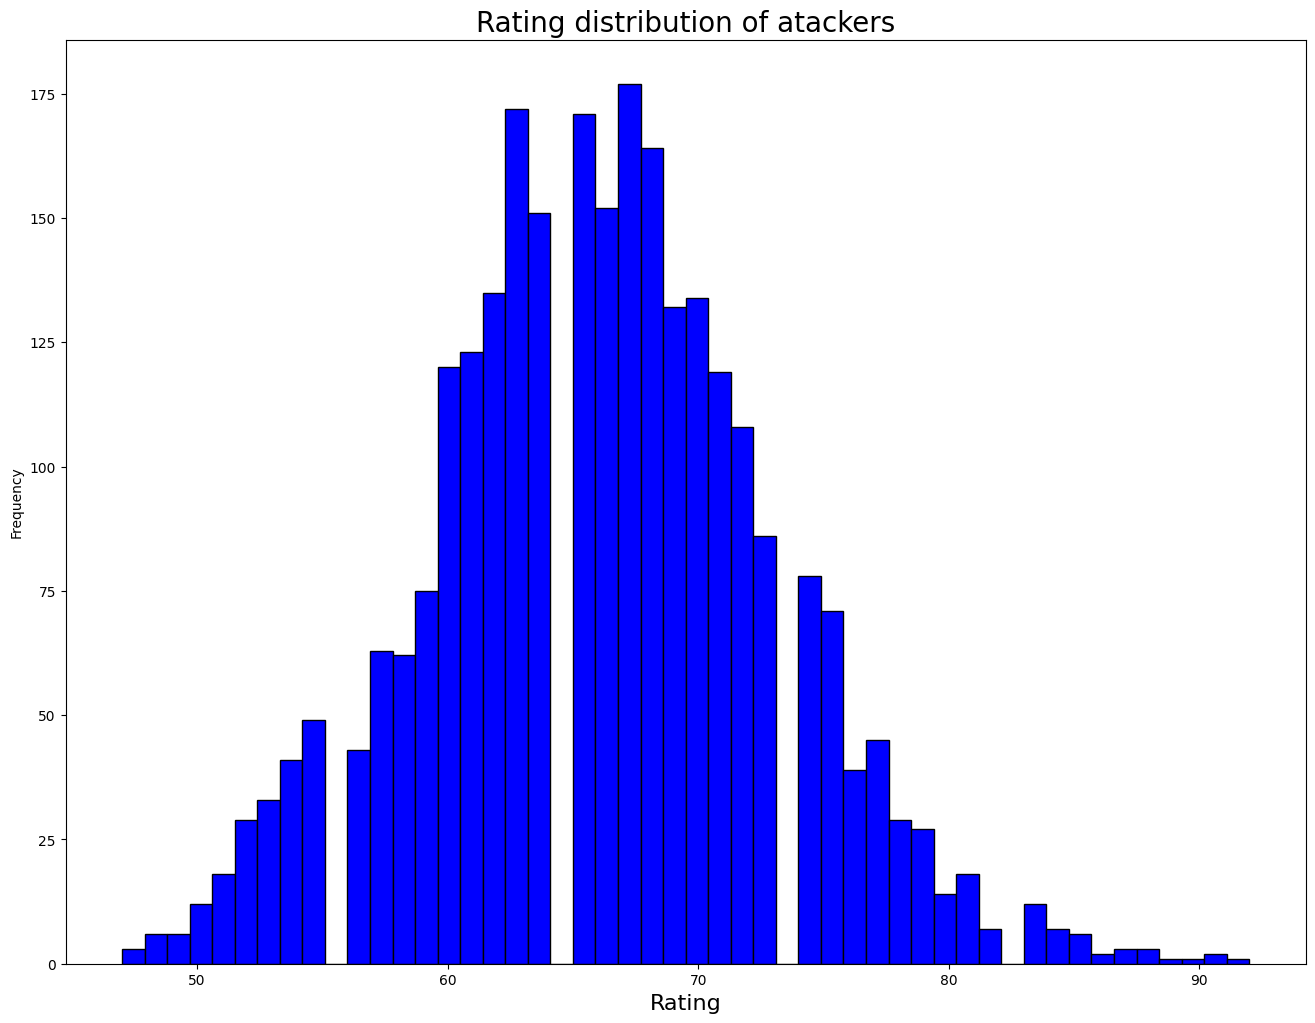

In [912]:

fig, ax = plt.subplots(figsize = (16,12))
df['overall'][df['type_of_player'] == 'atacker'].plot(kind = "hist", bins = 50, color = "blue", edgecolor = "black", ax = ax)
ax.set_title("Rating distribution of atackers", fontsize = 20)
ax.set_xlabel("Rating", fontsize = 16)
plt.show()

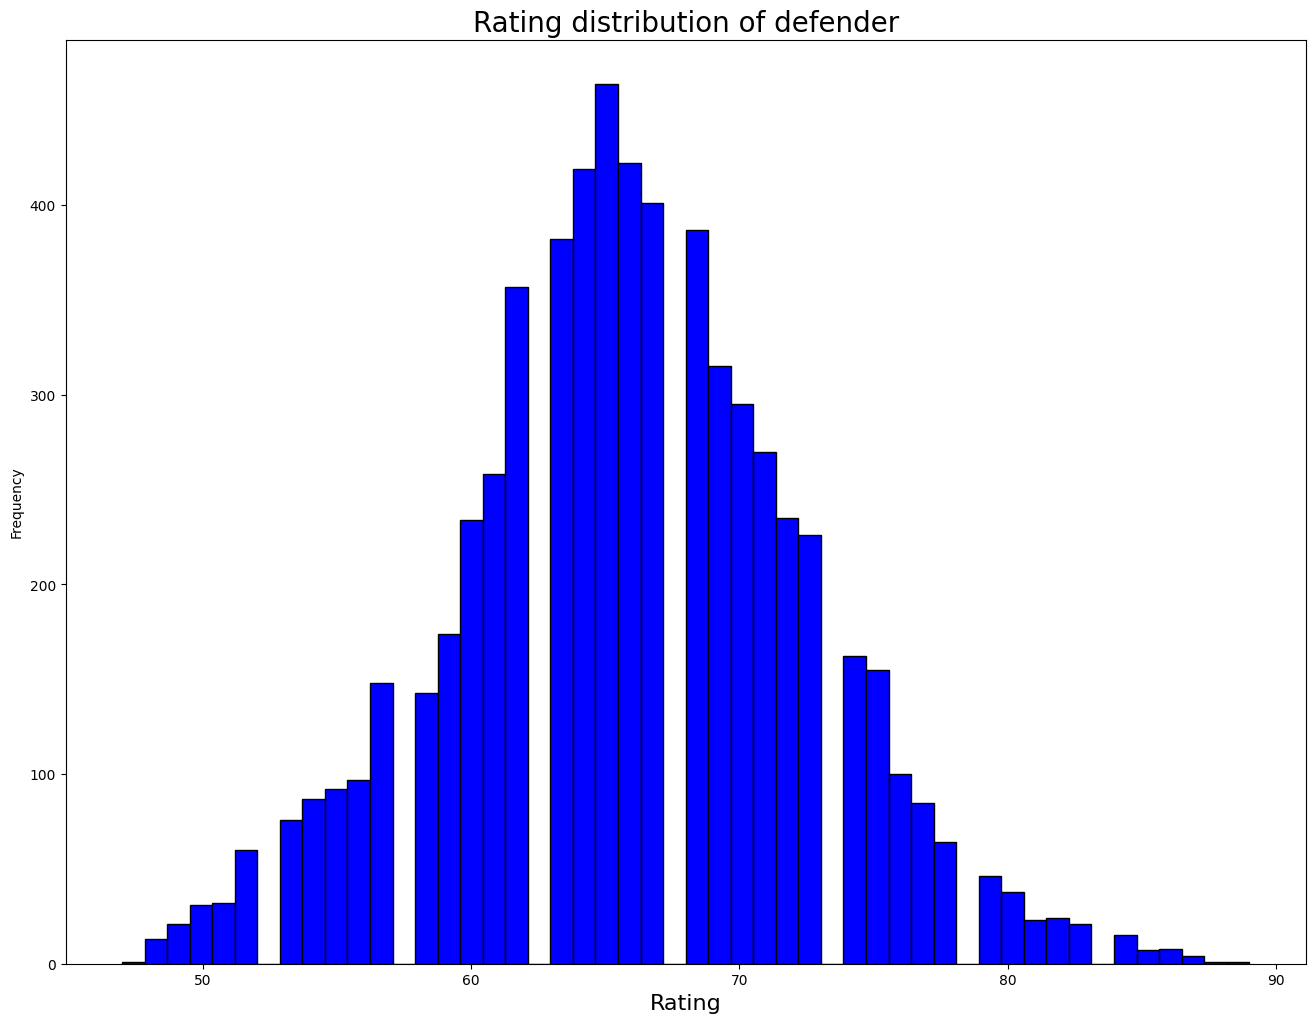

In [913]:
fig, ax = plt.subplots(figsize = (16,12))
df['overall'][df['type_of_player'] == 'defender'].plot(kind = "hist", bins = 50, color = "blue", edgecolor = "black", ax = ax)
ax.set_title("Rating distribution of defender", fontsize = 20)
ax.set_xlabel("Rating", fontsize = 16)
plt.show()

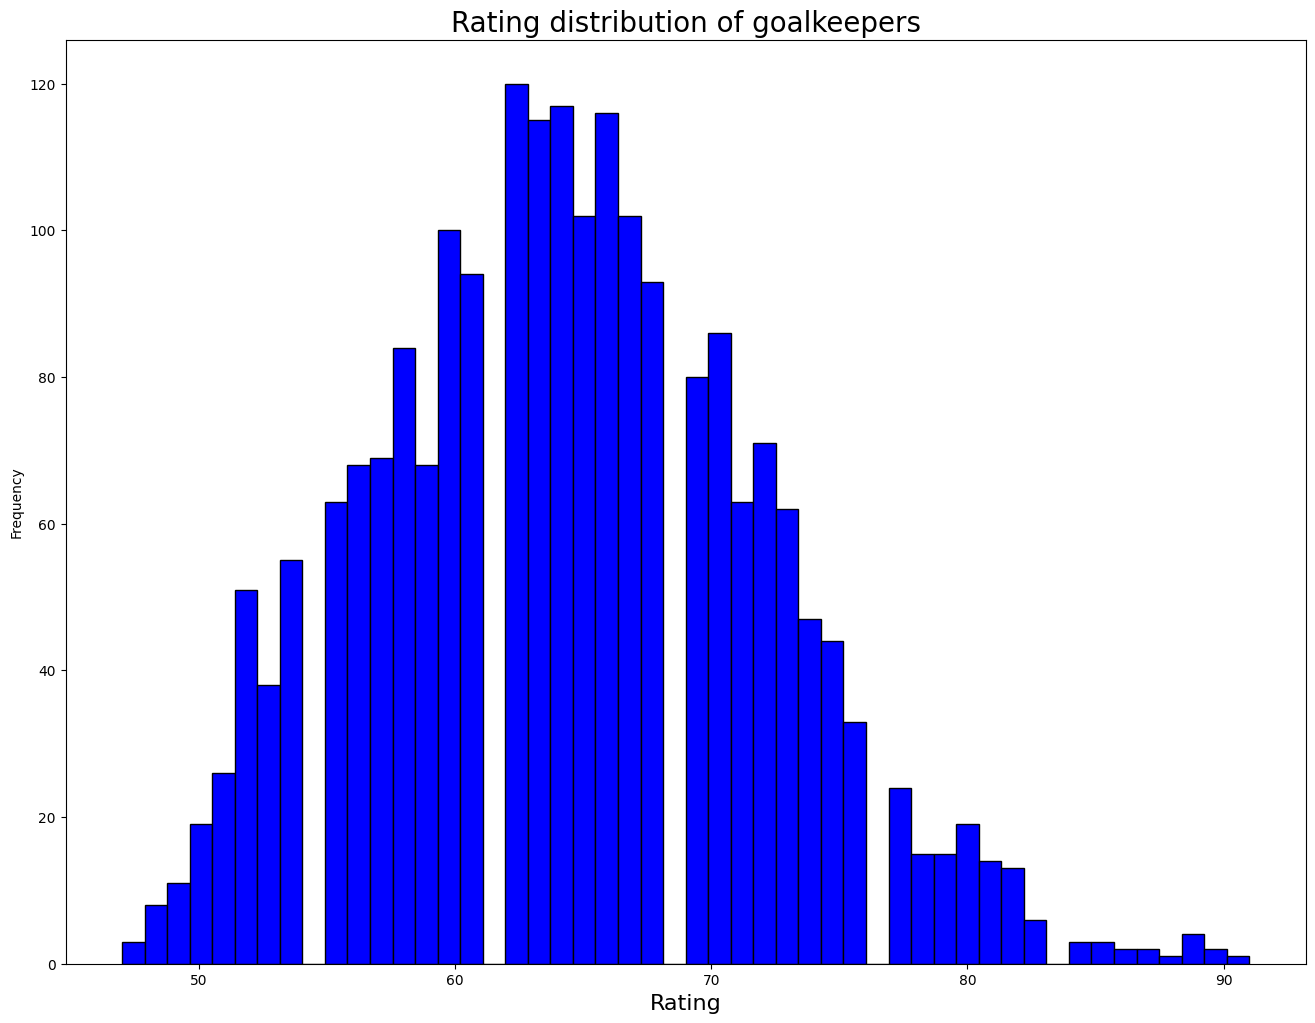

In [914]:

fig, ax = plt.subplots(figsize = (16,12))
df['overall'][df['type_of_player'] == 'goalkeeper'].plot(kind = "hist", bins = 50, color = "blue", edgecolor = "black", ax = ax)
ax.set_title("Rating distribution of goalkeepers", fontsize = 20)
ax.set_xlabel("Rating", fontsize = 16)
plt.show()

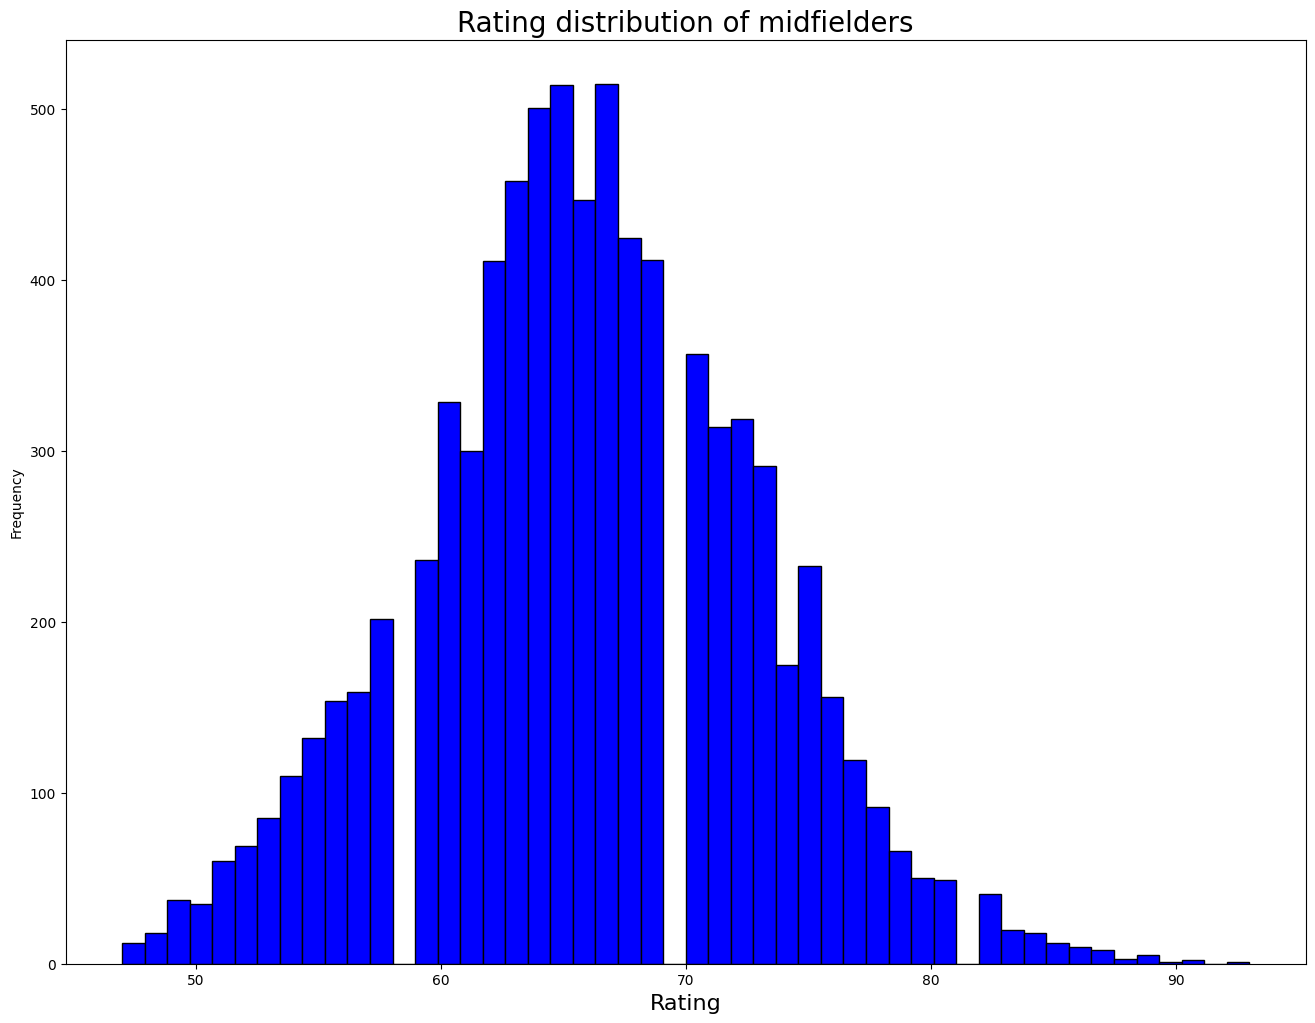

In [915]:

fig, ax = plt.subplots(figsize = (16,12))
df['overall'][df['type_of_player'] == 'midfielder'].plot(kind = "hist", bins = 50, color = "blue", edgecolor = "black", ax = ax)
ax.set_title("Rating distribution of midfielders", fontsize = 20)
ax.set_xlabel("Rating", fontsize = 16)
plt.show()

Our data is similar to normal, so most players have an average rating, etc.

9)Distribution diagram of player nationalities by player rating. 

I think it will be representative to take the countries that have more than 50 football players and take top 20 from them and select the first 10 nations
This will show how much the country is able to create national team for national tournaments.

In [916]:
average_nationality_rating = {}
nationalities = df.nationality_name.unique()
for nationality_name in nationalities:
    nationality = df[df['nationality_name'] == nationality_name]
    if len(nationality)>50: #checks if nationality have more 500 football players
        nationality.sort_values(by=['overall'], ascending=False)
        average_nationality_rating[nationality_name] = nationality['overall'].head(25).mean()

average_nat_rating = pd.DataFrame.from_dict(average_nationality_rating,orient='index',columns=['Average_Rating'])
average_nat_rating = average_nat_rating.sort_values(by=['Average_Rating'], ascending=False)
average_nat_rating = average_nat_rating.rename(columns={'index':'nationality'})
average_nat_rating = average_nat_rating.reset_index()
average_nat_rating=average_nat_rating.head(15)
average_nat_rating




    

,index,Average_Rating
0,Spain,84.68
1,Germany,84.60
2,France,84.44
3,Brazil,84.24
4,England,83.92
5,Argentina,83.04
6,Italy,83.00
7,Portugal,83.00
8,Belgium,81.64
9,Netherlands,81.52


<Axes: xlabel='index', ylabel='Average_Rating'>

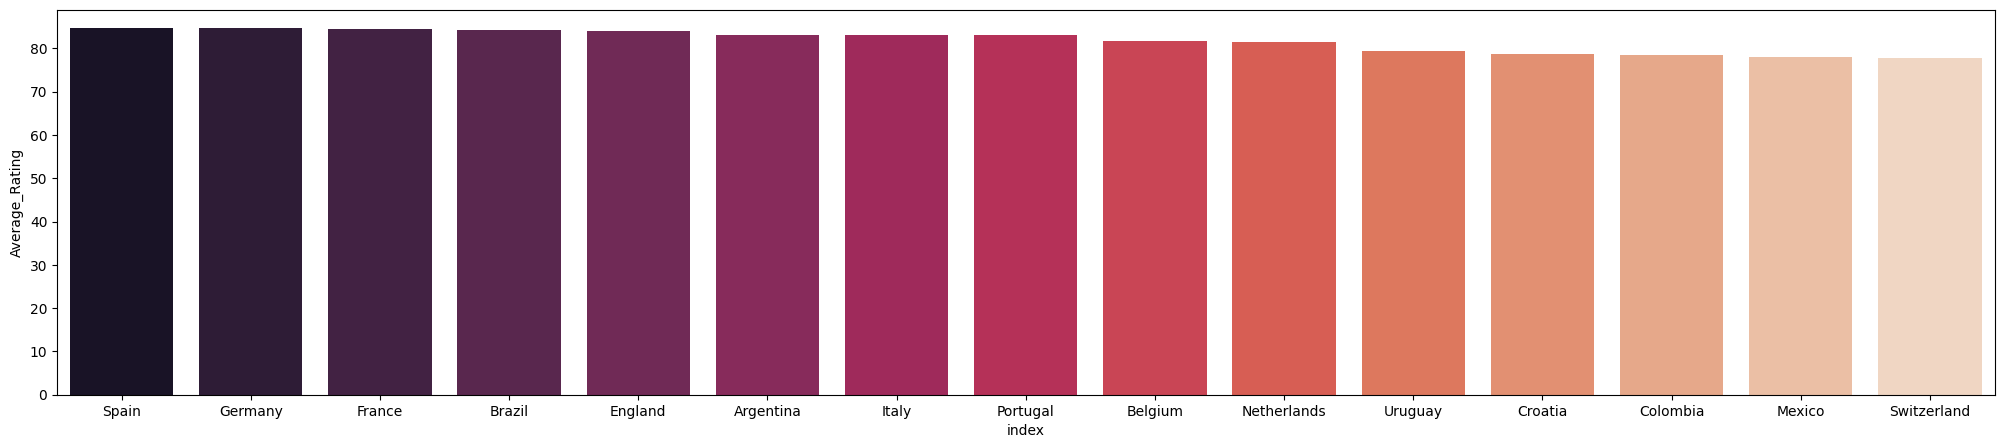

In [917]:
import seaborn as sns
plt.figure(figsize=(25, 5))
sns.barplot(x = "index" , y  = 'Average_Rating', data = average_nat_rating ,palette='rocket')


These countries can have good teams for  national tournaments

## PART Three

11. To come up with a metric that will evaluate the quality of the penalty taker.

I'll take the average between  mental_penalties+ power_shot_power/2
I do not use the shooting column, because it consists of unnecessary metrics for penalties

In [918]:
df['doing_penalties'] = np.nan
df.loc[(df['type_of_player'] !='goalkeeper'),'doing_penalties'] =  ( df['power_shot_power']+ df['mentality_penalties'])/2


12. To come up with a metric that will evaluate the quality of a goalkeeper who saves a penalty.
From these data for metrics, take only goalkeeping_diving, goalkeeping_reflexes, and find the average
I want to explain why I didn't take goalkeeping_handling, because for a penalty you only need to hit it, you don't need to catch it, so I didn't take it

In [919]:
df['penalties_handling'] = np.nan

df.loc[(df['type_of_player']=='goalkeeper'),'penalties_handling'] = (df['goalkeeping_diving']
+df['goalkeeping_reflexes'] )/2


13. Are there any clubs where the penalty takers are significantly (guess what "substantially" means) better than the goalkeepers who shoot? And vice versa?

For me, "significant" is when penalties and penalties handling metrics differ by more than 15
This question can only be answered by naming the teams, not by naming specific players. So I will find the top goalkeeper in the team and compare with the 10th penalty taker
because only some people take penalties, and the goalkeeper is always the same,so I think it will not be representative to compare the goalkeeper with worst penalty taker


It is obvious that there are players who do not take penalties, which means that, most likely, this indicator will be much lower for them, or are there any new players who are not allowed to take penalties, so they are "significantly" worse than the first goalkeeper

But in the team, only one goalkeeper usually takes a penalty, and the indicator of how good the penalty saver is in the team should be applied only to him. So, obviously, there will not be a "significantly" worse first goalkeeper than penalty takers

In [920]:
clubs_with_better_gk_then_penalties = []

club_names = df.club_name.unique()
for club_name in club_names:
    club = df[df['club_name'] == club_name]
    if len(club) >= 10:
        gk = club[club['type_of_player'] == 'goalkeeper']
        gk = gk.sort_values(by=['penalties_handling'], ascending=False)
        gk1 = gk.iloc[0]
        player = club[club['type_of_player'] != 'goalkeeper']
        player = player.sort_values(by=['doing_penalties'], ascending=False)
        player1 = player.iloc[6]
        if gk1['penalties_handling'] > player1['doing_penalties'] +15:
            clubs_with_better_gk_then_penalties.append(club_name)
        


In [921]:
clubs_with_better_gk_then_penalties

['FC Barcelona',
 'Tottenham Hotspur',
 'Leicester City',
 'Real Sociedad',
 'RB Leipzig',
 'Aston Villa',
 'Eintracht Frankfurt',
 'PFC CSKA Moscow',
 'SV Werder Bremen',
 'Fortaleza',
 'Club Universidad Nacional',
 'DSC Arminia Bielefeld',
 'FC Lokomotiv Moscow',
 'Stade Brestois 29',
 'Al Ittihad',
 'Philadelphia Union',
 'AIK',
 'Al Raed',
 'Lecce',
 'Centro Atlético Fénix',
 'Ulsan Hyundai FC',
 'FC Lorient',
 'Al Batin',
 'Aarhus GF',
 'Rosenborg BK',
 'FC Erzgebirge Aue',
 'FC Lugano',
 'América de Cali',
 'Al Hazem',
 'APOEL Nicosia FC',
 'Club Deportes Tolima',
 'CD Antofagasta',
 'La Equidad',
 '12 de Octubre FC',
 'Sociedad Deportiva Aucas',
 'IK Sirius',
 'Östersunds FK',
 'Central Coast Mariners',
 'Club Social y Deportivo Macará']

In this teams, penalty takers are significantly better than the goalkeepers who shoot

14. Top 10 clubs with the best penalty kickers.

I will take top 7 penalty takers from each team and take the average of them

In [922]:
average_club_penalty_rating = {}
club_names = df.club_name.unique()
for club_name in club_names:
    club = df[df['club_name'] == club_name]
    if len(club) >= 10:
        club.sort_values(by=['doing_penalties'], ascending=False)
        average_club_penalty_rating[club_name] = club['doing_penalties'].head(7).mean()
top10_teams_by_penalty_rating = pd.DataFrame.from_dict(average_club_penalty_rating,orient='index',columns=['Average_Rating'])
top10_teams_by_penalty_rating = top10_teams_by_penalty_rating.sort_values(by=['Average_Rating'], ascending=False)
top10_teams_by_penalty_rating = top10_teams_by_penalty_rating.rename(columns={'index':'club_name'})
top10_teams_by_penalty_rating = top10_teams_by_penalty_rating.reset_index()
top10_teams_by_penalty_rating = top10_teams_by_penalty_rating.head(10)
top10_teams_by_penalty_rating



,index,Average_Rating
0,Paris Saint-Germain,82.600000
1,Manchester United,79.357143
2,Real Madrid CF,77.333333
3,Levante Unión Deportiva,77.083333
4,Chelsea,75.357143
5,FC Bayern München,75.000000
6,U.C. Sampdoria,74.833333
7,Borussia Dortmund,74.714286
8,Leicester City,74.583333
9,Real Betis Balompié,74.583333


15. Top 10 clubs with the best goalkeepers.

Just take the first goalkeeper from each team

In [923]:
club_names = df.club_name.unique()
teams_goalkeepers_rating = {}


for club_name in club_names:
    club = df[df['club_name'] == club_name]
    if len(club) >= 2:
        gk = club[club['type_of_player'] == 'goalkeeper']
        gk = gk.sort_values(by=['penalties_handling'], ascending=False)
        gk1 = gk.iloc[0]
        gk1 = gk1['overall']
        teams_goalkeepers_rating[club_name] = gk1
top10_teams_by_goalkeeper_rating = pd.DataFrame.from_dict(teams_goalkeepers_rating,orient='index',columns=['Average_Rating'])
top10_teams_by_goalkeeper_rating = top10_teams_by_goalkeeper_rating.sort_values(by=['Average_Rating'], ascending=False)
top10_teams_by_goalkeeper_rating = top10_teams_by_goalkeeper_rating.rename(columns={'index':'club_name'})
top10_teams_by_goalkeeper_rating = top10_teams_by_goalkeeper_rating.reset_index()
top10_teams_by_goalkeeper_rating = top10_teams_by_goalkeeper_rating.head(10)
top10_teams_by_goalkeeper_rating


    

,index,Average_Rating
0,Atlético de Madrid,91
1,FC Barcelona,90
2,FC Bayern München,90
3,Paris Saint-Germain,89
4,Manchester City,89
5,Real Madrid CF,89
6,Liverpool,89
7,Tottenham Hotspur,87
8,Juventus,87
9,Inter,86


In [924]:
df

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_position,...,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,type_of_player,doing_penalties,penalties_handling
0,L. Messi,RW,93,93,78000000.0,320000.0,34,170,72,RW,...,24,6,11,15,14,8,NaN,midfielder,80.5,NaN
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,ST,...,19,15,6,12,8,10,NaN,atacker,90.0,NaN
2,Cristiano Ronaldo,ST,91,91,45000000.0,270000.0,36,187,83,ST,...,24,7,11,15,14,11,NaN,atacker,91.0,NaN
3,Neymar Jr,LW,91,91,129000000.0,270000.0,29,175,68,LW,...,29,9,9,15,15,11,NaN,midfielder,86.5,NaN
4,K. De Bruyne,CM,91,91,125500000.0,350000.0,30,181,70,RCM,...,53,15,13,5,10,13,NaN,midfielder,87.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,CDM,47,52,70000.0,1000.0,22,180,64,SUB,...,48,6,10,5,15,13,NaN,midfielder,44.0,NaN
19235,C. Porter,CM,47,59,110000.0,500.0,19,175,70,RES,...,47,11,12,6,8,10,NaN,midfielder,46.5,NaN
19236,N. Logue,CM,47,55,100000.0,500.0,21,178,72,RES,...,48,8,6,7,10,6,NaN,midfielder,44.5,NaN
19237,L. Rudden,ST,47,60,110000.0,500.0,19,173,66,RES,...,11,7,10,7,14,15,NaN,atacker,48.5,NaN


## Part FOUR

What is the business value of these graphs?

This can be useful for clubs that want to know how much or how little they pay a player with similar characteristics.

This can be useful for someone who collects fifa cards, who wants to know which players have the best stats and wants to create a fifa team.

For football coaches who lack a player with a certain characteristic for their team or when preparing for a match, what to statistically expect from the opponent.

This can be useful for a person who bets on football matches.

It can be useful for commentators, for interesting facts about football.

Attracting fans and sponsors: Businesses involved in the organization of football matches can use player data to attract the attention of fans and sponsors. Information about player success, popularity, skill and style of play can influence participant engagement, ticket sales and sponsorship deals.

Marketing and branding: Football clubs and football-related brands can use player data analysis to create marketing campaigns. This means using the individual achievements of players, their personal characteristics and successes to attract attention and increase brand awareness.

## PART FIVE

17. Do EDA from a Data Scientist's point of view. What are the problems in the dataset?

In [925]:
df.head(5)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_position,...,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,type_of_player,doing_penalties,penalties_handling
0,L. Messi,RW,93,93,78000000.0,320000.0,34,170,72,RW,...,24,6,11,15,14,8,NaN,midfielder,80.5,NaN
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,ST,...,19,15,6,12,8,10,NaN,atacker,90.0,NaN
2,Cristiano Ronaldo,ST,91,91,45000000.0,270000.0,36,187,83,ST,...,24,7,11,15,14,11,NaN,atacker,91.0,NaN
3,Neymar Jr,LW,91,91,129000000.0,270000.0,29,175,68,LW,...,29,9,9,15,15,11,NaN,midfielder,86.5,NaN
4,K. De Bruyne,CM,91,91,125500000.0,350000.0,30,181,70,RCM,...,53,15,13,5,10,13,NaN,midfielder,87.0,NaN


In [926]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   19239 non-null  object 
 1   player_positions             19239 non-null  object 
 2   overall                      19239 non-null  int64  
 3   potential                    19239 non-null  int64  
 4   value_eur                    19165 non-null  float64
 5   wage_eur                     19178 non-null  float64
 6   age                          19239 non-null  int64  
 7   height_cm                    19239 non-null  int64  
 8   weight_kg                    19239 non-null  int64  
 9   club_position                19178 non-null  object 
 10  club_name                    19178 non-null  object 
 11  league_name                  19178 non-null  object 
 12  league_level                 19178 non-null  float64
 13  nationality_name

In [927]:
df.columns

Index(['short_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_position',
       'club_name', 'league_name', 'league_level', 'nationality_name',
       'nation_position', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'player_tags',
       'player_traits', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'me

I will not leave such columns:<br>

**potential** because it strongly correlates with overall<br>

**value_eur**, because it strongly correlates with salaries and is less 
representative for new players who have a salary but no value_eur<br>

**national_position** because few values are not empty<br>

**player_tags**, **player_traits**, because few values are not empty and difficult to use somehow<br>
**goalkeeping_speed**, because it is 0 for non-goalkeepers, and it is not 0 for goalkeepers<br>



In [928]:
columns_to_save =['short_name','player_positions', 'overall', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'club_position', 'league_level', 'nationality_name',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']

In [929]:
df= df[columns_to_save]

In [930]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   19239 non-null  object 
 1   player_positions             19239 non-null  object 
 2   overall                      19239 non-null  int64  
 3   wage_eur                     19178 non-null  float64
 4   age                          19239 non-null  int64  
 5   height_cm                    19239 non-null  int64  
 6   weight_kg                    19239 non-null  int64  
 7   club_position                19178 non-null  object 
 8   league_level                 19178 non-null  float64
 9   nationality_name             19239 non-null  object 
 10  preferred_foot               19239 non-null  object 
 11  weak_foot                    19239 non-null  int64  
 12  skill_moves                  19239 non-null  int64  
 13  international_re

there are **no pace** values for goalkeepers, these are good values, we will replace them with 0

In [931]:
df.loc[df['pace'].isna()==True,'pace']=0
df.loc[df['shooting'].isna()==True,'shooting']=0
df.loc[df['dribbling'].isna()==True,'dribbling']=0
df.loc[df['defending'].isna()==True,'defending']=0

df.loc[df['physic'].isna()==True,'physic']=0
df.loc[df['passing'].isna()==True,'passing']=0
df = df.dropna()

In [932]:
df.describe()

,overall,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,international_reputation,pace,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.00000,19178.000000,19178.000000,19178.000000,...,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000,19178.000000
mean,65.760246,9017.989363,25.201168,181.288143,74.930493,1.354364,2.94598,2.352279,1.094066,60.661800,...,47.852904,57.909010,46.584211,48.032433,45.890812,16.397278,16.187246,16.049067,16.221660,16.484722
std,6.882432,19470.176724,4.746183,6.862150,7.065573,0.747865,0.67169,0.767557,0.370913,23.760078,...,15.766472,12.161191,20.199506,21.227856,20.750015,17.561204,16.829124,16.555612,17.048276,17.873283
min,47.000000,500.000000,16.000000,155.000000,49.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,61.000000,1000.000000,21.000000,176.000000,70.000000,1.000000,3.00000,2.000000,1.000000,58.000000,...,38.000000,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,66.000000,3000.000000,25.000000,181.000000,75.000000,1.000000,3.00000,2.000000,1.000000,67.000000,...,49.000000,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,70.000000,8000.000000,29.000000,186.000000,80.000000,1.000000,3.00000,3.000000,1.000000,75.000000,...,60.000000,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,93.000000,350000.000000,54.000000,206.000000,110.000000,5.000000,5.00000,5.000000,5.000000,97.000000,...,93.000000,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000


I see some outliers in age,wage,height,weight

In [933]:
df =df[df['age']<40]
df= df[df['weight_kg']<=95]
df=df[df['height_cm']>=170]
df=df[df['height_cm']<=194]
df=df[df['wage_eur']<10000]
df= df[df['weight_kg']>=65]


In [934]:
df["BMI"] = (df['weight_kg'])/((df['height_cm']**2)/10000)
df.drop(columns= ['height_cm','weight_kg'],inplace=True)

In [935]:
k =df.loc[df['BMI']>25]
k[['short_name','BMI']]

,short_name,BMI
300,Marlos,25.102391
424,Ismaily,27.450605
544,Y. El Arabi,25.359256
1336,Y. Gómez Andrade,26.309017
1467,A. Pyatov,25.484765
...,...,...
18944,J. Charles,25.393431
18993,A. Lopane,25.951557
19047,M. Al-Taay,25.013521
19192,L. Jongte,25.082863


These players need to lose weight

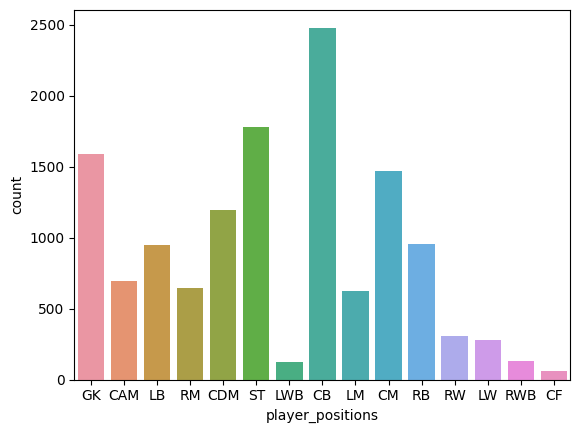

In [936]:
sns.countplot(data=df, x='player_positions')
plt.show()

We see that there are positions that are rarely used by players, it may be that these positions on the field are considered ineffective.

But this will be a problem for predicting positions that rarely occur, I could do undersampling or oversampling, but I also have a more accurate model without them

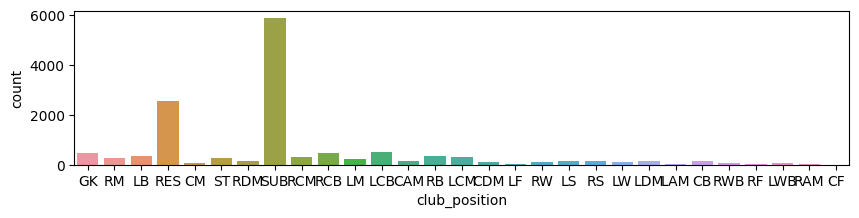

In [937]:
plt.figure(figsize=(10, 2))
sns.countplot(data=df, x='club_position')

plt.show()

We see that most of the players in the clubs are spares

Let's look at countplot without them

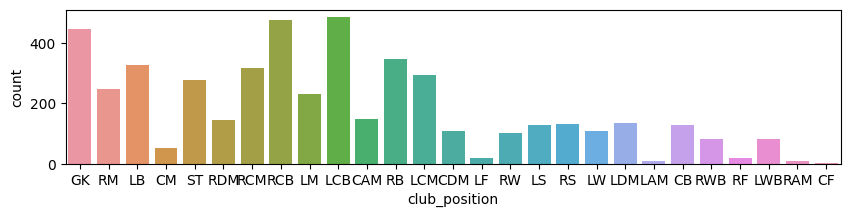

In [938]:
df1 = df[(df['club_position']!='SUB')&(df['club_position']!='RES')]
plt.figure(figsize=(10, 2))
sns.countplot(data=df1, x='club_position')

plt.show()

We see the positions in which players rarely play, I have already mentioned the possible reasons<br>
it is : **CL,RF,LAM,LF,RAM**

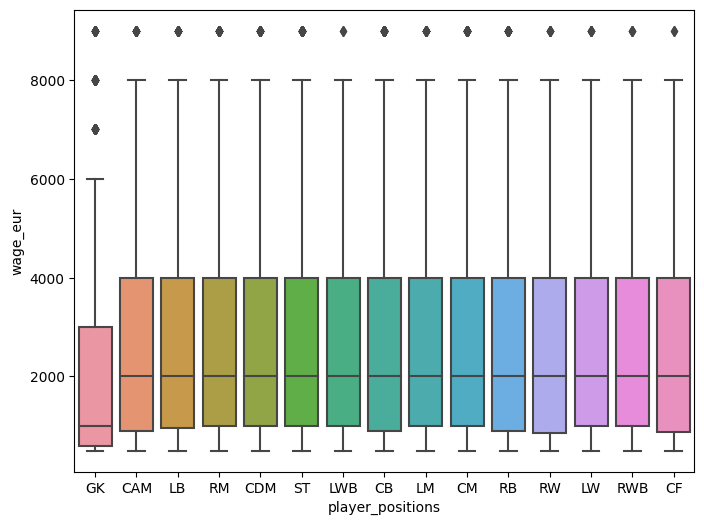

In [939]:
var = 'wage_eur'
data = pd.concat([df['player_positions'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='player_positions', y=var, data=data)

we see that goalkeepers for some reason receive less than other players, I will leave these few outliers

In [940]:
df.columns

Index(['short_name', 'player_positions', 'overall', 'wage_eur', 'age',
       'club_position', 'league_level', 'nationality_name', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'work_rate',
       'body_type', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_s

we only have a wage and BMI

There is no point in researching them, they are not strongly correlated

In [941]:
df.drop(columns=['short_name'],inplace=True)

**DISCRETE VARIABLES**

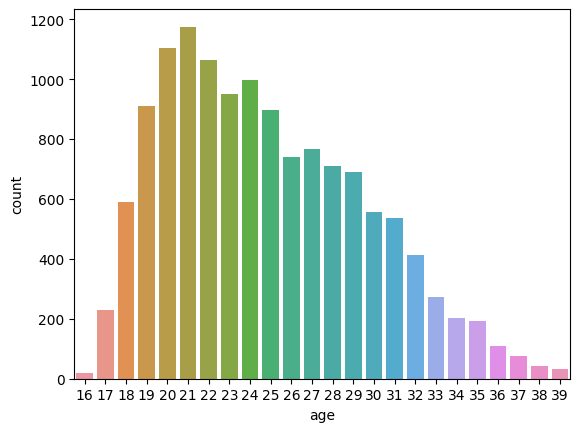

In [942]:
sns.countplot(data=df, x='age')
plt.show()

We see a normal distribution, slightly shifted to the left, which means that young players are being recruited

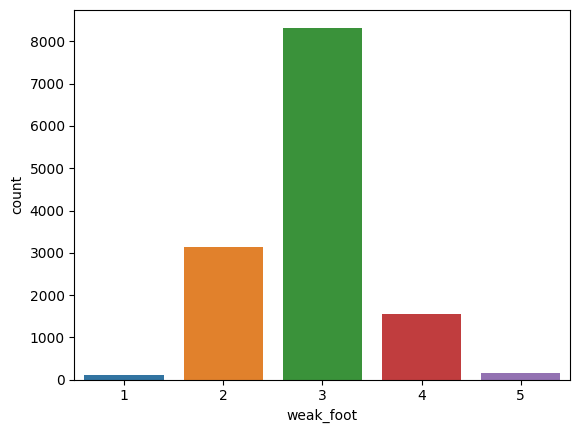

In [943]:
sns.countplot(data=df, x='weak_foot')
plt.show()

Most players have a weak leg at an average level

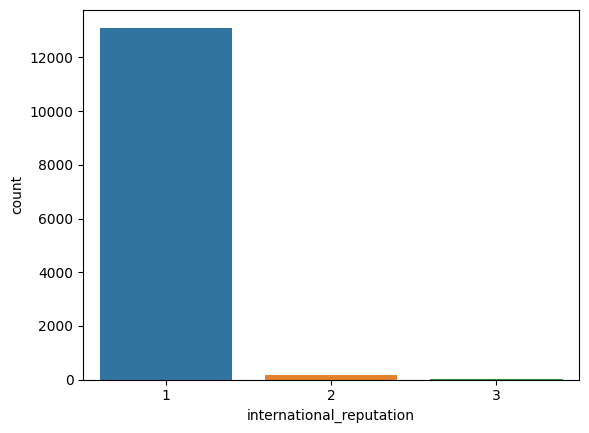

In [944]:
sns.countplot(data=df, x='international_reputation')
plt.show()

Most of the players are not known internationally

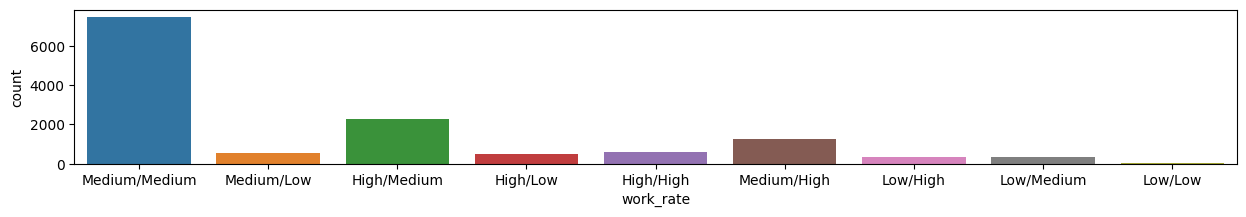

In [945]:
plt.figure(figsize=(15, 2))
sns.countplot(data=df, x = 'work_rate')

plt.show()

Most players don't give their all, although they should

We need to encode our variables

In [946]:
from sklearn.preprocessing import LabelEncoder
discrete = [ 'player_positions','league_level', 'nationality_name',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type','club_position']
encoder = LabelEncoder()
# Create a sample categorical variable
for i in discrete:
    df[i] = encoder.fit_transform(df[i])

To test for multicollinearity, let's do VIF

In [947]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a dataframe called 'df' with independent variables

# Create an empty dictionary to store the VIF results
vif_results = {}

# Iterate over each column in the dataframe
for column in df.columns:
    # Create the design matrix for the current column
    X = sm.add_constant(df.drop(column, axis=1))
    
    # Calculate the VIF for the current column
    vif = variance_inflation_factor(X.values, 1)
    
    # Store the VIF result in the dictionary
    vif_results[column] = vif

# Print the results
for column, vif in vif_results.items():
    print(f"Column: {column}")
    print(f"VIF: {vif}")
    print()


Column: player_positions
VIF: 6.648148016478249

Column: overall
VIF: 2.6096246480500973

Column: wage_eur
VIF: 2.6089633982584077

Column: age
VIF: 2.6026365480610343

Column: club_position
VIF: 2.572927199629638

Column: league_level
VIF: 2.6094420731881147

Column: nationality_name
VIF: 2.6084771543433685

Column: preferred_foot
VIF: 2.596878947841751

Column: weak_foot
VIF: 2.6071927959728387

Column: skill_moves
VIF: 2.596950246551492

Column: international_reputation
VIF: 2.6096824306763673

Column: work_rate
VIF: 2.606263844271236

Column: body_type
VIF: 2.6092782820390608

Column: pace
VIF: 2.60471846460374

Column: shooting
VIF: 2.604428386541314

Column: passing
VIF: 2.555490540382063

Column: dribbling
VIF: 2.609178147476489

Column: defending
VIF: 2.6097016203233654

Column: physic
VIF: 2.609639023007213

Column: attacking_crossing
VIF: 2.468432784916376

Column: attacking_finishing
VIF: 2.6079653669536498

Column: attacking_heading_accuracy
VIF: 2.588110944118582

Column: 

**As we can see, there are no values greater than 5, so there is no multicollinearity, so I will use all the variables in our model (I tried adding different columns to the model, but it works best with all of them)**

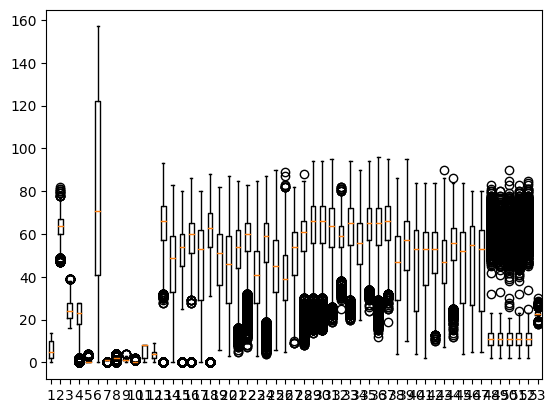

In [948]:
plt.boxplot(df.drop(columns = ['wage_eur']))
plt.show()

we see a lot of outliers on the right side, this is good data, because our goalkeepers have small characteristics, and the goalkeeper characteristics are small in other players

I think,It will be good idea to just leave them

In [949]:
X = df.drop(columns=['player_positions','club_position'])
y = df['player_positions']

I will standardize my data for better perform 

In [950]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X = scaler.fit_transform(X)

In [951]:
X.shape

(13281, 52)

18. Do feature engineering, prepare the necessary variables for modeling.

19. Make a feature selection, choose those variables that will be most necessary for building the model.

Feature enginering and feature selection will make for me PCA)))))))))))

In [952]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load your dataset


# Create an instance of PCA and specify the desired number of components
n_components = 40 # Number of principal components
pca = PCA(n_components=n_components)

# Fit the PCA model to the scaled data
pca.fit(X)

# Transform the data to the lower-dimensional space
X = pca.transform(X)

# Access the explained variance ratio of the principal components
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Print the transformed data
print("Transformed Data:")
print(X)

Explained Variance Ratio:
Principal Component 1: 0.4811
Principal Component 2: 0.1104
Principal Component 3: 0.0771
Principal Component 4: 0.0375
Principal Component 5: 0.0279
Principal Component 6: 0.0215
Principal Component 7: 0.0206
Principal Component 8: 0.0194
Principal Component 9: 0.0186
Principal Component 10: 0.0180
Principal Component 11: 0.0159
Principal Component 12: 0.0156
Principal Component 13: 0.0144
Principal Component 14: 0.0117
Principal Component 15: 0.0112
Principal Component 16: 0.0099
Principal Component 17: 0.0086
Principal Component 18: 0.0073
Principal Component 19: 0.0070
Principal Component 20: 0.0058
Principal Component 21: 0.0057
Principal Component 22: 0.0052
Principal Component 23: 0.0048
Principal Component 24: 0.0045
Principal Component 25: 0.0042
Principal Component 26: 0.0039
Principal Component 27: 0.0036
Principal Component 28: 0.0033
Principal Component 29: 0.0028
Principal Component 30: 0.0027
Principal Component 31: 0.0026
Principal Component 32

**Choose a classification algorithm. Build a prediction for the player's position depending on the parameters.**

You can try several models. Try to achieve the highest accuracy.

First, without using the club_position, nation_position variables.

Then with them. Something changed?

I got 80 % accuracy with 40 columns from 52
therefore, 12 variables did not affect anything at all

In [953]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [954]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# # Split your data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = svm.SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8012796386902522


Test with club_position

In [955]:
X = df.drop(columns=['player_positions'])
y = df['player_positions']
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X = scaler.fit_transform(X)

In [956]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [957]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# # Split your data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = svm.SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8099360180654874


Take my word for it, I tried a lot of models and tried different parameters, this model showed the best

CLub Position did not greatly affect the result